# GW Waveforms in the frequency domain

This notebook will show:
 * How to plot a gravitational wave signal
 * The signal has lower frequency at earlier times, and higher frequency around the time of the merger
 * How to convert the signal to the frequency domain

In [7]:
# -- For google co-lab
# ! pip install -q pycbc

Text(0.5, 1.0, 'Whole waveform')

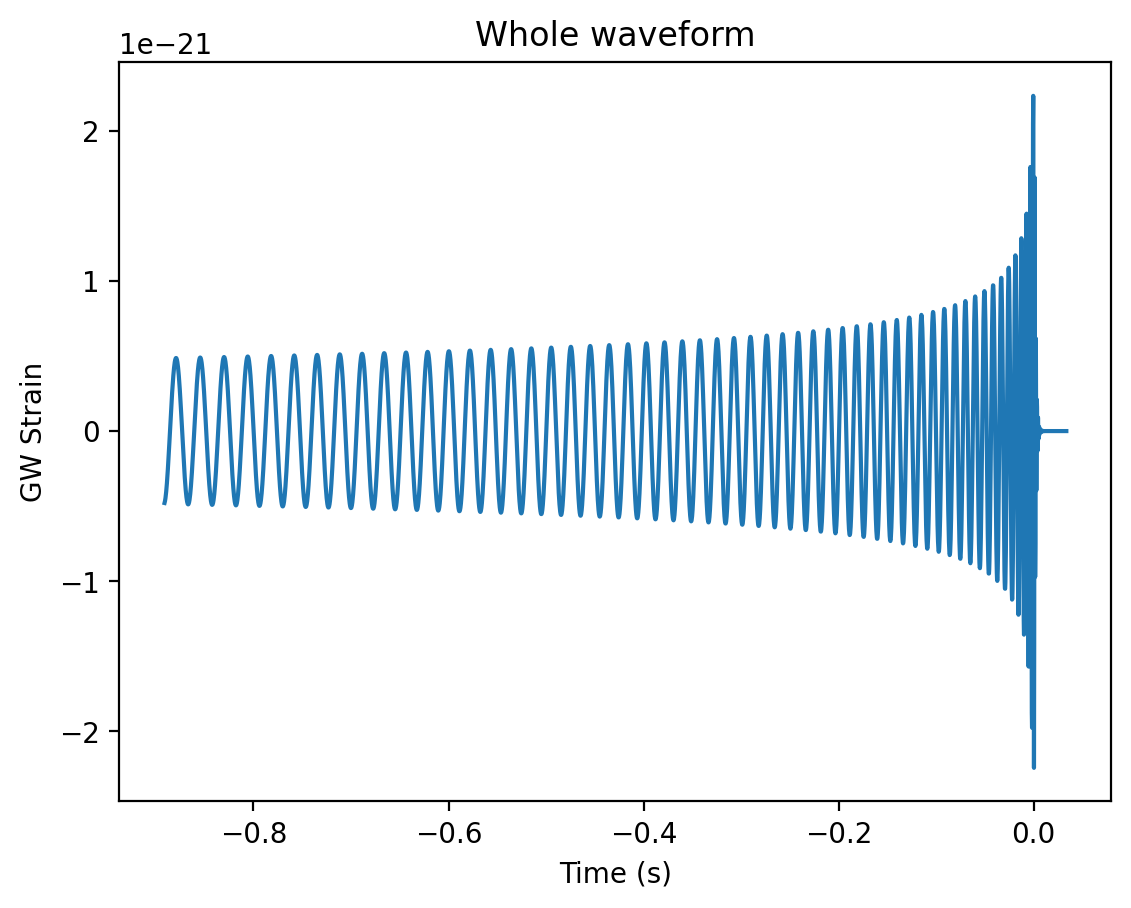

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pycbc.waveform import get_td_waveform
%matplotlib inline
%config InlineBackend.figure_format='retina'

fs = 4096
apx = 'SEOBNRv2'
hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 delta_t=1.0/fs,
                                 distance = 100,
                                 f_lower=40)

time = hp.sample_times
plt.plot(time,hp)
plt.xlabel('Time (s)')
plt.ylabel('GW Strain')
plt.title('Whole waveform')


## Frequency evolution

The waveform above changes frequency with time.  At first, the compact objects (black holes or neutron stars) are relatively far from each other, and so have longer orbital periods.  The longer orbital periods create lower frequency signals.  

As the compact objects get closer with time, their orbits occur faster, leading to higher frequency signals.

Let's take a closer look.

#### Early part of merger

Here, we'll plot only the early part of the waveform.

1. Using the plot below, count the rate of peaks to estimate the frequency of the signal at this time, early in the merger.

_Hint: The frequency is measured in cycles per second_

Text(0, 0.5, 'GW Strain')

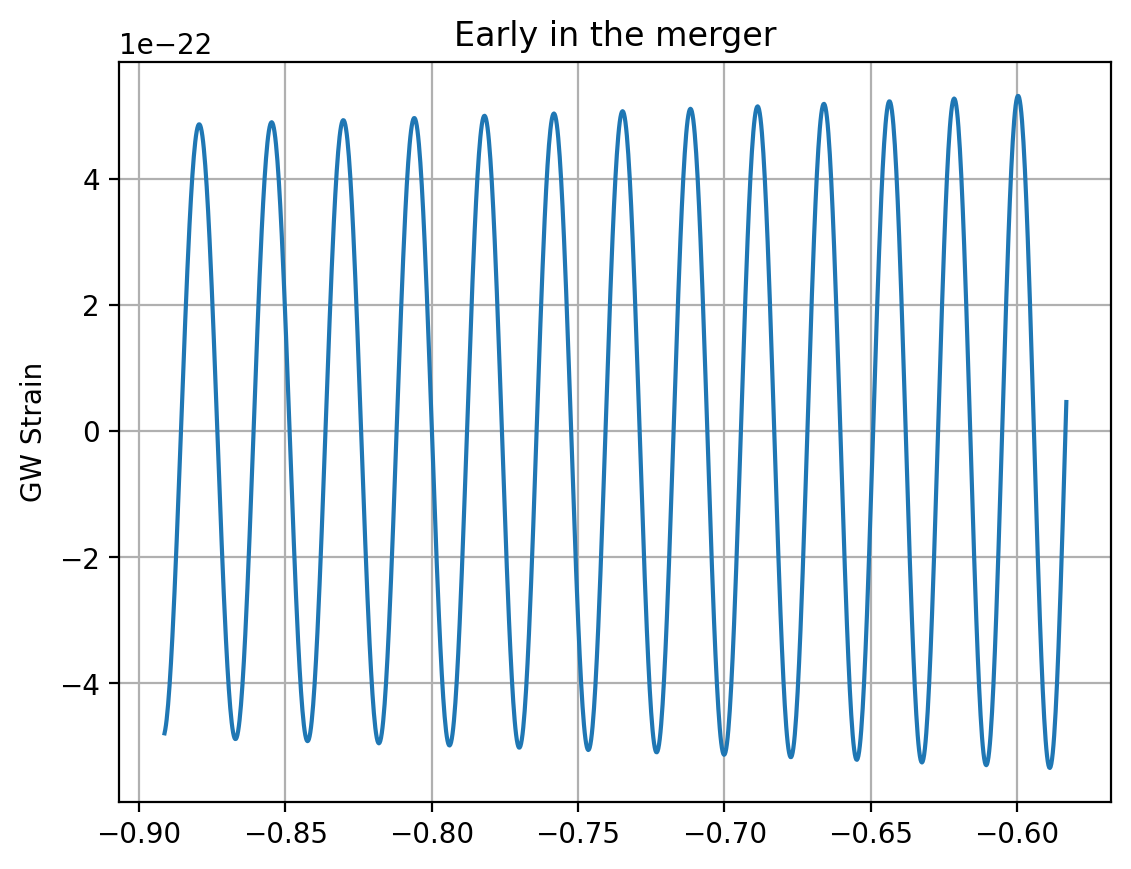

In [9]:
n = len(hp)
indx = slice(0,int(n/3))
plt.plot(time[indx],hp[indx])
plt.grid()
plt.title('Early in the merger')
plt.ylabel('GW Strain')

# Count the rate of peaks to estimate the frequency of the signal 
# at this time, early in the merger.
# Hint: The frequency is measured in cycles per second

#### Late part of merger

Here, we'll plot only the late part of the waveform, around the time of merger.

2. Using the plot below, count the rate of peaks to estimate the frequency of the signal at this time.  Use the time from -0.02 seconds to merger at time 0.

Text(0.5, 1.0, 'Late in the merger')

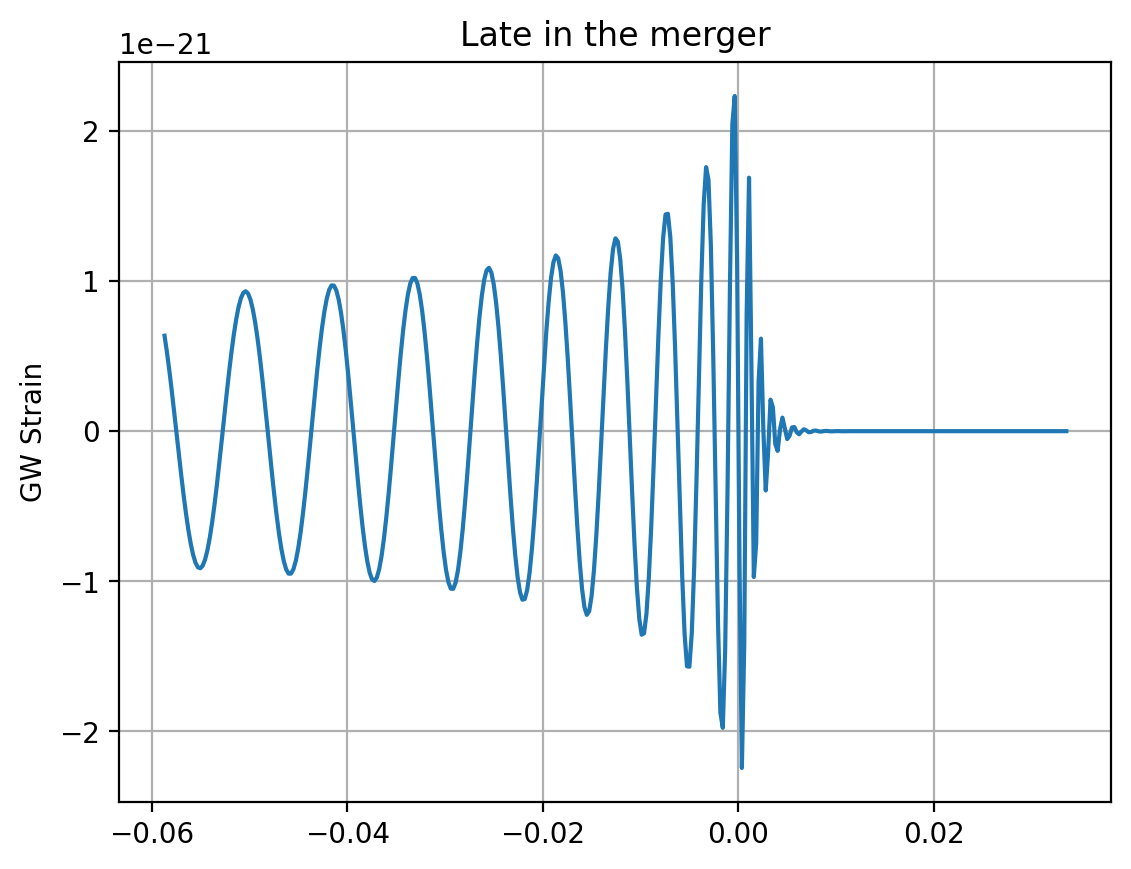

In [10]:
# -- Late in the merger
indx = slice(int(9*n/10),None)
plt.figure()
plt.plot(time[indx],hp[indx])
plt.grid()
plt.ylabel('GW Strain')
plt.title('Late in the merger')

In [11]:
#help(hp.qtransform)
#noise = np.random.normal(len(hp))*1e-23
#w_noise = hp+noise
#t, f, qplane = (w_noise).qtransform()

## Signal in the frequency domain

We can convert the same signal to the frequency domain.  What we'll see is a lot of signal energy at lower frequencies, because the waveform spends a longer amount of time at these frequencies.  At higher frequencies, we'll see a small amount of signal energy, corresponding to the moments just before merger.  And, above the merger frequency, we'll see a fast drop-off in signal energy, because the compact objects never orbit faster than at the time of merger.

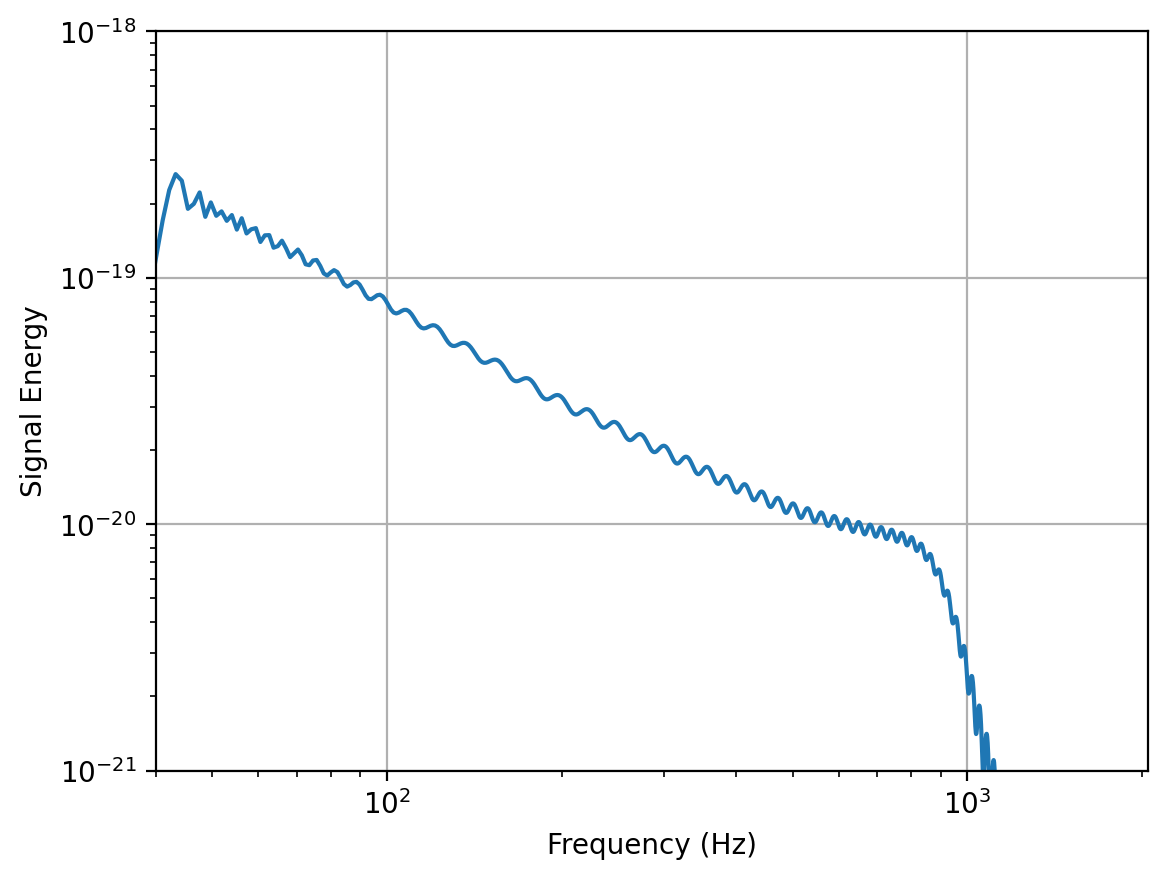

In [12]:
# -- Plot in the frequency domain
from scipy import signal
win = signal.windows.tukey(len(hp))
hp_win = win*hp
hp_freq = np.fft.rfft(hp)
frequencies = np.fft.rfftfreq(len(hp))*fs

plt.loglog(frequencies, np.abs(hp_freq))
plt.xlim(40,fs/2)
plt.ylim(1e-21, 1e-18)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Signal Energy')
plt.grid()

## Check questions

1. In the early part of the merger, what frequency did you estimate?
1. In the late part of the merger, what frequency did you estimate?
1. How long, in seconds, is the waveform in this example?
1. In the frequency domain spectrum, which frequency has the highest amount of signal energy?  Can you explain why?

### Python practice

1. Make a waveform like the one used here, but use mass1 = mass2 = 20 solar masses.

2. Plot the frequency domain plot of this new 'higher mass' waveform, along with the first 'lower mass' waveform.

3. Which system has a higher merger frequency?

3. Which system has a more signal energy at 100 Hz?